In [1]:
%cd ../utils


/home/thom/Documents/research/RandomBridge/utils


In [2]:
import importlib
import numpy as np
from pdb import pm
import pbn_parse
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import CardUtils
import datetime

In [4]:
importlib.reload(pbn_parse)
importlib.reload(CardUtils)

<module 'CardUtils' from '/home/thom/Documents/research/RandomBridge/utils/CardUtils.py'>

In [5]:
result = pbn_parse.get_all_files(tod='Afternoon')

In [6]:
ts =[]
for day in sorted(result.keys()):
    ts.append(
        sum((CardUtils.get_features(deal) 
             for deal in result[day])) / len(result[day]))
ts = np.array(ts)

In [7]:
tp = CardUtils.theoretical_probabilities

In [8]:
timeseries = (ts-tp).T

In [9]:
timeseries.shape

(20, 307)

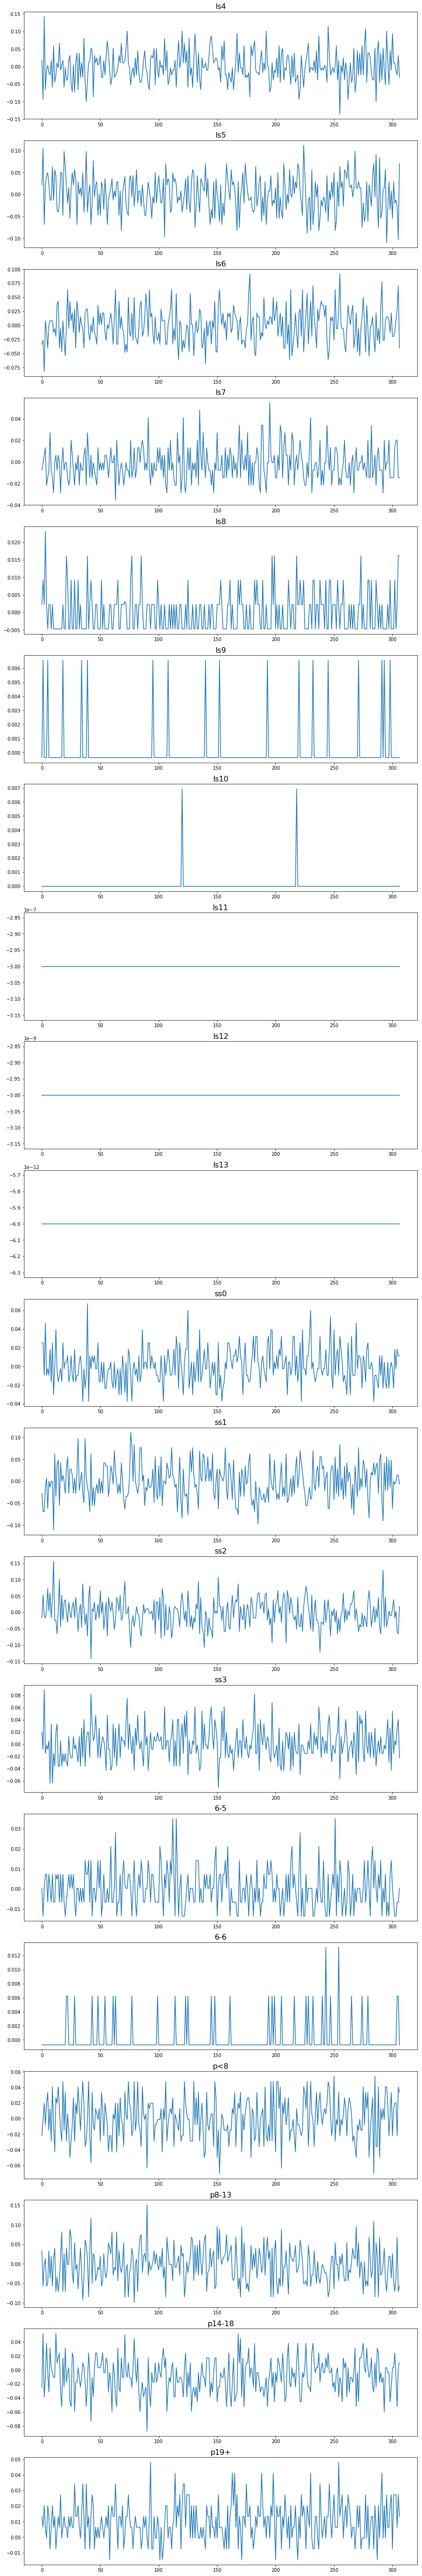

In [23]:

fig, ax = plt.subplots(20,1, figsize = (15, 100))

for i in range(20):
    plt.subplot(20,1,i+1)
    plt.title(CardUtils.feature_string[i],fontsize=16)
    plt.plot(timeseries[i])

In [31]:
timeseries_sign = np.sign(timeseries)

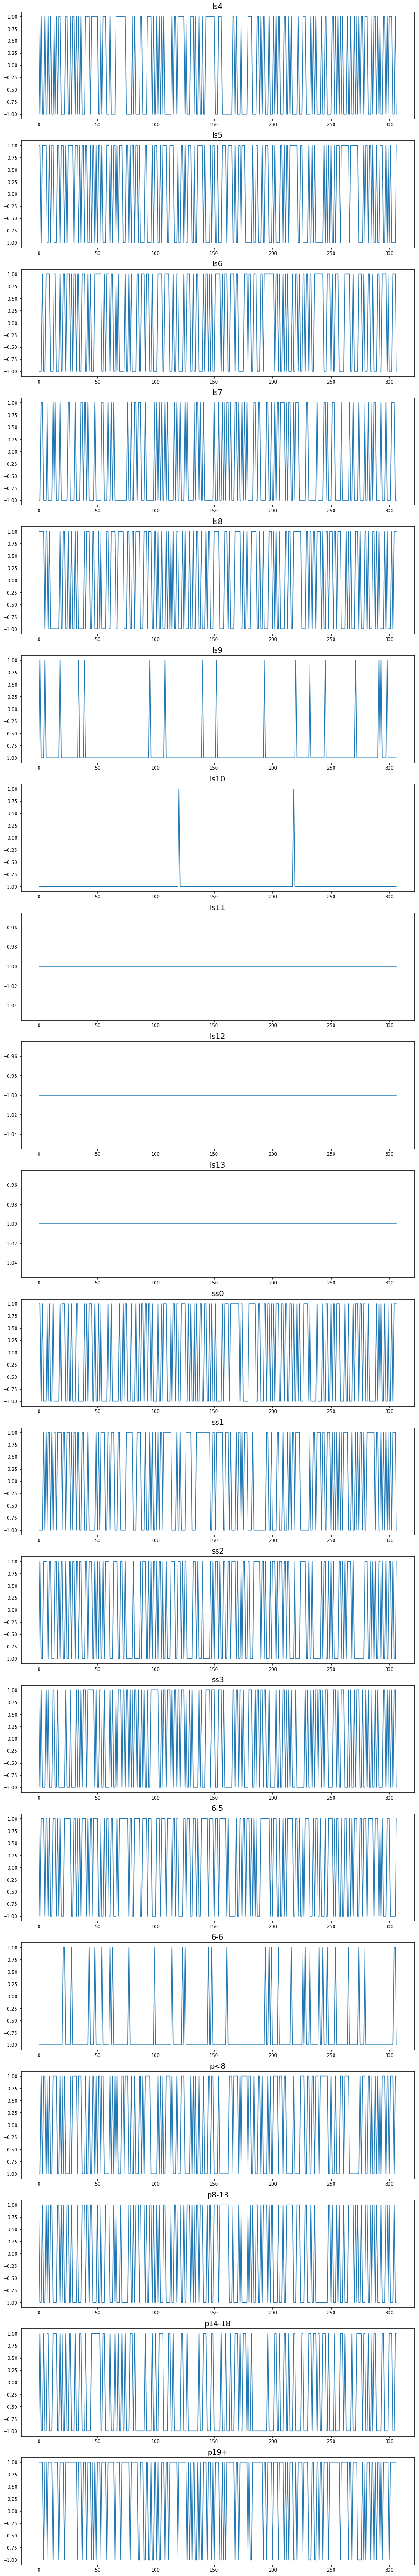

In [32]:

fig, ax = plt.subplots(20,1, figsize = (15, 100))
for i in range(20):
    plt.subplot(20,1,i+1)
    plt.title(CardUtils.feature_string[i],fontsize=16)
    plt.plot(timeseries_sign[i])

In [63]:
means = np.apply_along_axis(np.mean, 1, ts.T)

In [64]:
print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
for i in range(len(CardUtils.feature_string)):
    print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(CardUtils.feature_string[i], 
                                       tp[i], 
                                       means[i], 
                                       tp[i]-means[i]))

Feature                         p                   p_hat                p-p_hat        
ls4                   0.350800000000000001  0.351291055917480999 -0.000491055917480998
ls5                   0.443400000000000016  0.444725313668717592 -0.001325313668717576
ls6                   0.165500000000000008  0.165382019845578487  0.000117980154421521
ls7                   0.035299999999999998  0.033486586138255517  0.001813413861744481
ls8                   0.004700000000000000  0.004685237965979009  0.000014762034020992
ls9                   0.000370000000000000  0.000384545783568585 -0.000014545783568585
ls10                  0.000017000000000000  0.000045240680419834 -0.000028240680419834
ls11                  0.000000300000000000  0.000000000000000000  0.000000300000000000
ls12                  0.000000003000000000  0.000000000000000000  0.000000003000000000
ls13                  0.000000000006000000  0.000000000000000000  0.000000000006000000
ss0                   0.05120000000000000

In [4]:
mil = pbn_parse.get_deals_from_file("../BigDeal/1mil.pbn")

In [5]:
mil.shape

(1000000, 52)

In [7]:
CardUtils.get_features(mil[999999])

array([0.25, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.25, 0.75, 0.  , 0.  , 0.  , 0.5 , 0.25, 0.25, 0.  ])